# Activity: Logistic Functions

In [3]:
from cyllene import *

from sympy import solve,log, plot, diff, symbols
a, b, c, d, p, q, r, s, t, w, x, y, z = symbols(
    'a b c d p q r s t w x y z', real=True)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import Image


In [5]:
def logistic_function(x,k,C,L):
    
    return L/(1+C*np.exp(-k*x))


def logistic_plot_L(L):

    plt.figure(2)
    x = np.linspace(-1, 20, num=1000)
    plt.plot(x, logistic_function(x,0.5, 10, L))
    plt.ylim(0, 10)
    plt.show()

    
def second_derivative(expr):
    return diff(diff(expr,x),x)

## The definition of a logistic function

A *logistic function* is a function of the form

$f(x) = \dfrac{L}{1+C \, e^{-kx}},$

where $L, C, k$ are *parameters*.

Logistic functions *initially* exhibit growth that is similar to *exponential*, but after a while the growth begins to slow down as a saturation property takes hold of the growth process.

In [6]:
f = function('1/(1+10*exp(-x))')

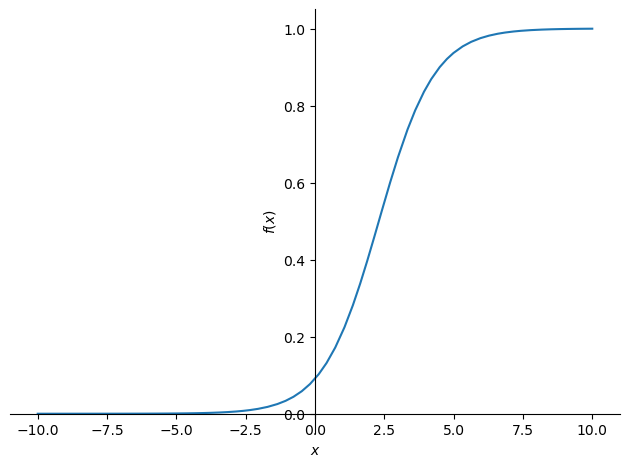

In [7]:
plot(f(x));

### The parameter $L$

Let us take a look at the paramater $L$. Use the slider below to change the value of $L$.
What effect does this have on the graph of a logistic function?

In [9]:
interactive_plot = interactive(logistic_plot_L, L=(1, 8, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=4.0, description='L', max=8.0, min=1.0, step=0.5), Output(layout=Layou…

We see that $L$ determines the **height of the graph**. It is the **limiting value** of the logistic function. The values of $f$ will approach $L$ as $x$ goes to infinity. The parameter $L$ is also called the **carrying capacity**.

## The inflection point

Let us again consider a simple logistic function:

In [10]:
f = function('5/(1+10*exp(-2*x))')

To find possible inflection points, we need to compute the second derivative:

In [11]:
f2 = second_derivative(f(x))
f2

-200*exp(-2*x)/(1 + 10*exp(-2*x))**2 + 4000*exp(-4*x)/(1 + 10*exp(-2*x))**3

You can check your answer by running the code below:

In [12]:
p = solve(f2,x)[0]
solve(f2,x)[0]

log(sqrt(10))

Now plug the solution into the original function: 

In [13]:
f(p)

5/2

Repeat this with different values for the parameters $L, C, k$. Do you observe a relation between $L$ and the location of the inflection point?

**FACT**: The inflection point of a logistic function occurs where $f(x) = L/2$. 

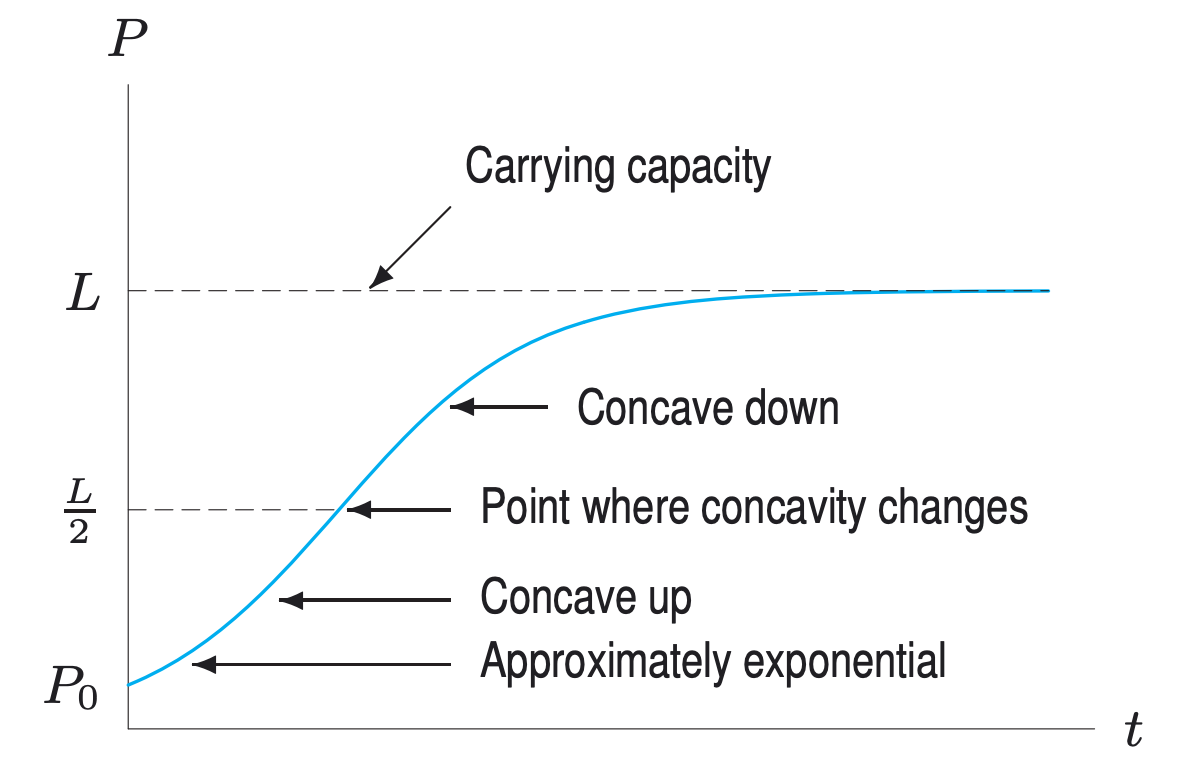

In [14]:
Image(filename='logistic_function.png', width=600) 

---

## Logistic modeling of COVID-19 data

In the following cell, we read the current Coronavirus data from CSSE at Johns Hopkins University. We extract a time series for the US, giving us for each day since January 22 the total number of infected persons.

In [15]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
country = df[df["Country/Region"] == "Italy"]
# country = df[df["Country/Region"] == "Sweden"]
# country = df[df["Country/Region"] == "Germany"]
# country = df[df["Country/Region"] == "US"]

interval_len = 120

x_data = list(range(interval_len))
y_data = list(country.iloc[int(0),int(4):int(interval_len+4)])

We run a logistic regression for our data and the logistic model.

In [16]:
fit = curve_fit(logistic_function, x_data, y_data)

In [17]:
k = round(fit[0][0],3)
C = round(fit[0][1],3)
L = int(fit[0][2])

print("We estimated the following parameters:")
print("k = ", k)
print("C = ", C)
print("L = ", L)

We estimated the following parameters:
k =  0.099
C =  1166.931
L =  221633


### Question: What does the parameter $L$ reflect in this case?

#### Plotting the data

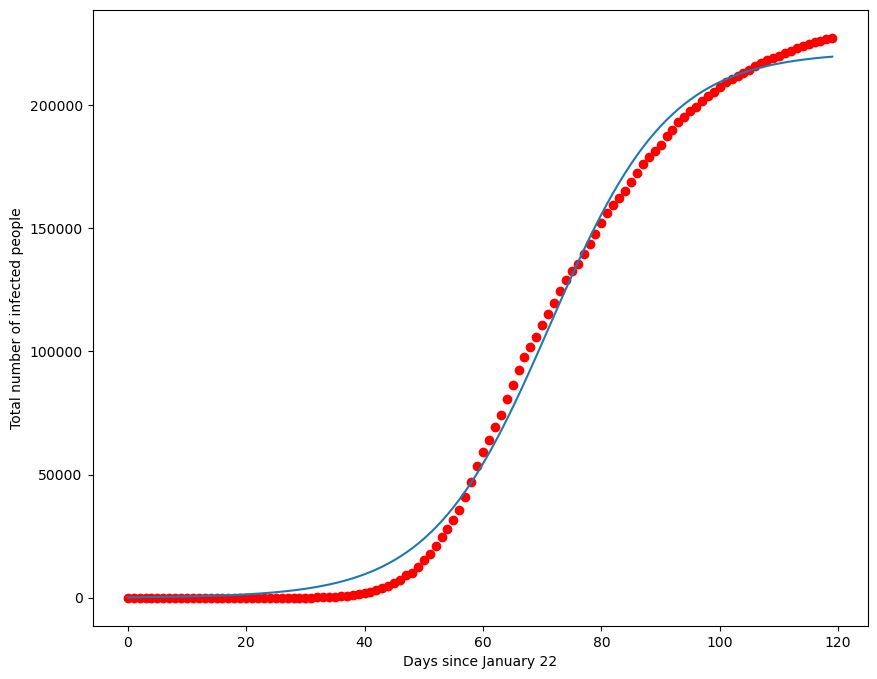

In [18]:
plt.figure(figsize=(10,8))

plt.scatter(list(range(interval_len)),y_data,label="Real data",color="red")

# Predicted logistic curve
t = np.arange(0, interval_len, 1) 
s = L/(1+C*np.exp(-k*t))
plt.plot(t,s)

plt.xlabel("Days since January 22")
plt.ylabel("Total number of infected people")

plt.show()